In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [9]:

for dirname, _, filenames in os.walk('/content/drive/MyDrive/train'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [18]:
DATADIR = '/content/drive/MyDrive/train'
CATEGORIES = ['rare', 'welldone']
IMG_SIZE=100

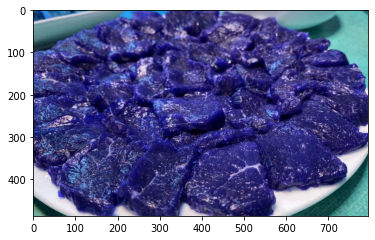

In [19]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [20]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()   

In [21]:
print(len(training_data))

1648


In [22]:
lenofimage = len(training_data)

In [23]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [24]:
X.shape

(1648, 30000)

In [25]:
X = X/255.0

In [26]:
y=np.array(y)

In [27]:
y.shape

(1648,)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [38]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
y2 = svc.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.9212121212121213


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       272
           1       0.91      0.91      0.91       223

    accuracy                           0.92       495
   macro avg       0.92      0.92      0.92       495
weighted avg       0.92      0.92      0.92       495



In [42]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [43]:
result

,original,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
490,1,0
491,0,0
492,0,0
493,1,1
